## c) Compare Variance of the DAX-Priceindex against WACC, Beta as well as riskfree interest rate development

In [ ]:
# Import required packages #####################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Import WACC, rf and Beta #####################################################

In [ ]:
# Import WACC, rf and Beta #####################################################
wacc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Promotion_Python/04_DAX_Kursindex_Analyse/01_Datensätze/DAX_Rohdaten_20211027.csv", 
                   sep = ";", decimal = ",", error_bad_lines = False)

wacc.head()

,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,Eigenkapitalquote_MKT,Fremdkapitalquote_MKT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,Aktienanzahl,Aktienkurs,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,Steuersaetze,Marktrendite_Mittelwert,Marktrendite_1Y,Marktrendite_10Y_DAI,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004.0,0.0513,0.0472,0.0443,0.070,NaN,0.326,0.674,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.3485,1355.3485,0.067074,0.326248,0.673752,45.65,29.69,0.025473,71.3,1063.0,0.378,0.1048,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005.0,0.0530,0.0448,0.0475,0.081,NaN,0.381,0.619,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4907.6000,1869.6000,0.062606,0.380960,0.619040,46.74,40.00,0.024358,74.0,1182.0,0.337,0.1048,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006.0,0.0618,0.0594,0.0584,0.075,NaN,0.581,0.419,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13217.9047,7673.9047,0.067847,0.580569,0.419431,203.39,37.73,0.033189,184.0,2712.0,0.314,0.1048,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007.0,0.0435,0.0435,0.0432,0.075,NaN,0.664,0.336,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0234,10436.0234,0.074890,0.663573,0.336427,203.59,51.26,0.032130,170.0,2270.0,0.318,0.1048,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008.0,0.0617,0.0651,0.0537,0.083,NaN,0.466,0.534,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11494.7784,5361.7784,0.075046,0.466453,0.533547,197.56,27.14,0.033100,203.0,2705.0,0.288,0.1048,-0.404,-0.004,0.093666,10799.0


### Data Preprocessing


In [ ]:
# Subset wacc dataframe and only include necessary columns
wacc = wacc[["Unternehmen", "Sektor", "Industrie", "Jahr", "WACC_GB_nSt", "WACC_GB_vSt", "Beta", "risikoloser Zins"]]

In [ ]:
# Remove decimal for Jahr ######################################################
wacc = wacc[:-1]
wacc["Jahr"] = wacc["Jahr"].astype(int)

wacc["Jahr"]


0      2004
1      2005
2      2006
3      2007
4      2008
       ... 
505    2019
506    2019
507    2020
508    2020
509    2020
Name: Jahr, Length: 510, dtype: int64

In [ ]:
# Subset wacc df in order to keep WACC_GB_nSt, Beta, risikoloser Zins
wacc_avail = wacc[wacc["Jahr"] > 0]
wacc_avail.head()

,Unternehmen,Sektor,Industrie,Jahr,WACC_GB_nSt,WACC_GB_vSt,Beta,risikoloser Zins
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.070,NaN,0.50,0.0410
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.081,NaN,0.51,0.0407
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.075,NaN,0.58,0.0338
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.075,NaN,0.03,0.0378
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.083,NaN,0.49,0.0423


In [ ]:
wacc_avail_ann = wacc_avail.groupby("Jahr").mean()
wacc_avail_ann["Log-Diff-Varianz"] = daxkurs_var_mean["Log-Diff-Varianz"]
wacc_avail_ann.head()

,WACC_GB_nSt,WACC_GB_vSt,Beta,risikoloser Zins,Log-Diff-Varianz
Jahr,,,,,
2004,0.071000,0.095000,0.822000,0.0410,0.000101
2005,0.071727,0.096167,0.829333,0.0407,0.000060
2006,0.073818,0.095167,0.850333,0.0338,0.000092
2007,0.074333,0.095833,0.733667,0.0378,0.000094
2008,0.076583,0.101500,0.780333,0.0423,0.000538


In [ ]:
#Create copy of dataframe to make name more understandable #####################
wacc_daxkurs = wacc_avail_ann.copy()
wacc_daxkurs.head()

,WACC_GB_nSt,WACC_GB_vSt,Beta,risikoloser Zins,Log-Diff-Varianz
Jahr,,,,,
2004,0.071000,0.095000,0.822000,0.0410,0.000101
2005,0.071727,0.096167,0.829333,0.0407,0.000060
2006,0.073818,0.095167,0.850333,0.0338,0.000092
2007,0.074333,0.095833,0.733667,0.0378,0.000094
2008,0.076583,0.101500,0.780333,0.0423,0.000538


In [ ]:
# Increase WACC numbers 
wacc_daxkurs["WACC_GB_nSt"] = wacc_daxkurs["WACC_GB_nSt"] * 100
wacc_daxkurs["WACC_GB_vSt"] = wacc_daxkurs["WACC_GB_vSt"] * 100
wacc_daxkurs["risikoloser Zins"] = wacc_daxkurs["risikoloser Zins"] * 100

wacc_daxkurs.head()


,WACC_GB_nSt,WACC_GB_vSt,Beta,risikoloser Zins,Log-Diff-Varianz
Jahr,,,,,
2004,7.100000,9.500000,0.822000,4.10,0.000101
2005,7.172727,9.616667,0.829333,4.07,0.000060
2006,7.381818,9.516667,0.850333,3.38,0.000092
2007,7.433333,9.583333,0.733667,3.78,0.000094
2008,7.658333,10.150000,0.780333,4.23,0.000538


### Visualisierung: WACC-Parameter vs. Varianzentwicklung

In [ ]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

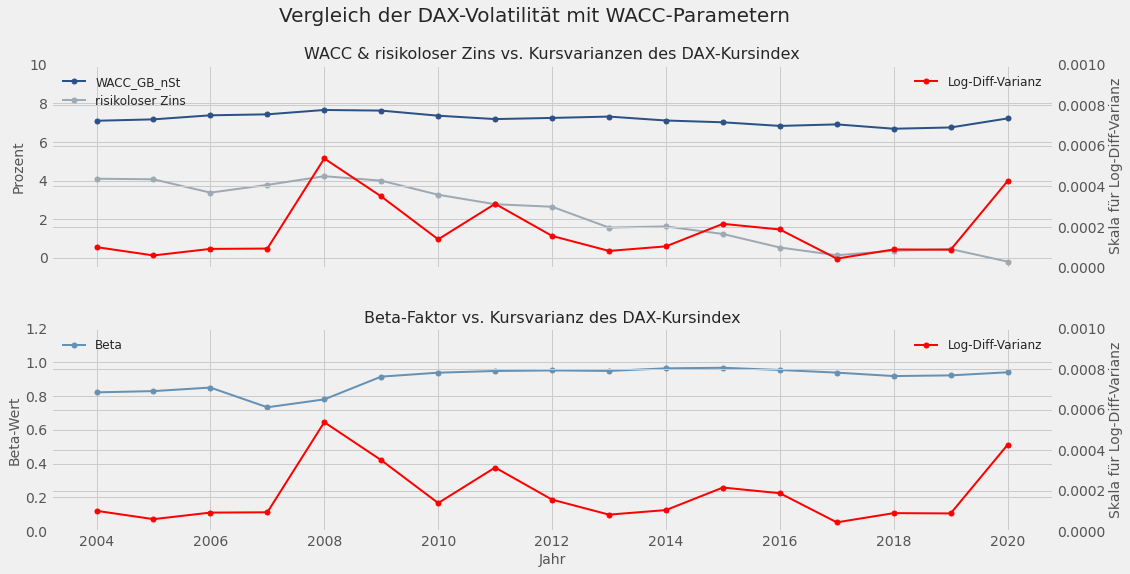

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

 # Plot setup ##################################################################
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
# Instantiate a second axes that shares the same x-axis
ax2 = np.array([a.twinx() for a in ax.ravel()]).reshape(ax.shape)

# Create left plot: WACC & rF vs. Log-Diff-Varianzen ###########################
wacc_daxkurs["WACC_GB_nSt"].plot(ax = ax[0], marker = "o", markersize = 5, linewidth = 2, color = "#2B5186")
wacc_daxkurs["risikoloser Zins"].plot(ax = ax[0], marker = "o", markersize = 5, linewidth = 2, color = "#9EA9B3")
wacc_daxkurs["Log-Diff-Varianz"].plot(ax = ax2[0], marker = "o", markersize = 5, linewidth = 2, color = "red");

ax[0].set_ylim(-0.5, 10)
ax2[0].set_ylim(0, 0.001)

ax[0].legend(loc = "upper left", fontsize = 12)
ax2[0].legend(fontsize = 12)

ax[0].set_title("WACC & risikoloser Zins vs. Kursvarianzen des DAX-Kursindex", fontsize = 16)
ax[0].set_xlabel("Jahr", fontsize = 14)
ax[0].set_ylabel("Prozent", fontsize = 14)
ax2[0].set_ylabel("Skala für Log-Diff-Varianz", fontsize = 14)

ax[0].tick_params(axis = "x", labelsize = 14)
ax[0].tick_params(axis = "y", labelsize = 14)
ax2[0].tick_params(axis = "y", labelsize = 14)


# Create right plot: WACC & rF vs. Log-Diff-Varianzen ###########################
wacc_daxkurs["Beta"].plot(ax = ax[1], marker = "o", markersize = 5, linewidth = 2, color = "#6591B4")
wacc_daxkurs["Log-Diff-Varianz"].plot(ax = ax2[1], marker = "o", markersize = 5, linewidth = 2, color = "red");

ax[1].set_ylim(0, 1.2)
ax2[1].set_ylim(0, 0.001)

ax[1].legend(loc = "upper left", fontsize = 12)
ax2[1].legend(fontsize = 12)

ax[1].set_title("Beta-Faktor vs. Kursvarianz des DAX-Kursindex", fontsize = 16)
ax[1].set_xlabel("Jahr", fontsize = 14)
ax[1].set_ylabel("Beta-Wert", fontsize = 14)
ax2[1].set_ylabel("Skala für Log-Diff-Varianz", fontsize = 14)

ax[1].tick_params(axis = "x", labelsize = 14)
ax[1].tick_params(axis = "y", labelsize = 14)
ax2[1].tick_params(axis = "y", labelsize = 14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.suptitle("Vergleich der DAX-Volatilität mit WACC-Parametern", fontsize = 20);

fig.savefig("/content/drive/MyDrive/Colab Notebooks/Promotion_Python/04_DAX_Kursindex_Analyse/Vergleich DAX_Volatilität_mit_WACC-Params.pdf", bbox_inches = "tight")

